# PRÁCTICA FINAL MACHINE LEARNING



## Nombres: Javier Tornel, Álvaro Muela, Sergio Castell

In [1]:
import numpy  as np  
import pandas as pd
import seaborn as sns 

import matplotlib.pyplot as plt 
%matplotlib inline

# 1. Análisis descriptivo

In [2]:
car = pd.read_csv("C://Users//sergi//Downloads//NCDB_1999_to_2014.csv") 
car.head()

C:\Users\sergi\AppData\Local\Temp\ipykernel_8952\2581366502.py:1: DtypeWarning: Columns (1,2,5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  car = pd.read_csv("C://Users//sergi//Downloads//NCDB_1999_to_2014.csv")


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3


### Tipo de variables

In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860405 entries, 0 to 5860404
Data columns (total 22 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   C_YEAR  int64 
 1   C_MNTH  object
 2   C_WDAY  object
 3   C_HOUR  object
 4   C_SEV   int64 
 5   C_VEHS  object
 6   C_CONF  object
 7   C_RCFG  object
 8   C_WTHR  object
 9   C_RSUR  object
 10  C_RALN  object
 11  C_TRAF  object
 12  V_ID    object
 13  V_TYPE  object
 14  V_YEAR  object
 15  P_ID    object
 16  P_SEX   object
 17  P_AGE   object
 18  P_PSN   object
 19  P_ISEV  object
 20  P_SAFE  object
 21  P_USER  object
dtypes: int64(2), object(20)
memory usage: 983.6+ MB


### Imputación de missings

En este dataset, la mayor parte de las variables tienen valores perdidos, que vienen detallados con los nombres *U*, *UU*, *UUUU*, *Q*, *QQ*, *QQQQ*, *N*, *NN*, *NNNN*, *X*, *XX*, *XXXX* según si no se ha querido dar una respuesta, si no se tiene o si por normativa no se puede dar. Lo primero será cambiar estos datos por valores NaN.

In [4]:
car = car.replace({"U": np.nan, "UU": np.nan, "UUUU": np.nan, "Q": np.nan, "QQ": np.nan, "QQQQ": np.nan, "N": np.nan, "NN": np.nan, "NNNN": np.nan, "X": np.nan, "XX": np.nan, "XXXX": np.nan})

Nos fijamos que en las variables `C_MNTH` y `C_WDAY` hay datos que se refieren a lo mismo pero que aparecen en dos versiones distintas. Por ejemplo, en la variable del mes, los valores 01 y 1 se refieren ambos a enero pero aparecen divididos y en la variable del día de la semana, cada día aparece duplicado. Por ello, agrupamos los datos para que cada valor solo se refiera a un único aspecto.

In [5]:
car['C_MNTH'] = car["C_MNTH"].replace({"01": 1, "02": 2, "11": 11, "12" : 12})
car["C_WDAY"] = car["C_WDAY"].replace({"7": 7, "1": 1, "2": 2, "3" : 3, "4":4, "5":5, "6":6})

Vemos la cantidad de missings que hay por variable:

In [6]:
car.isna().sum()

C_YEAR          0
C_MNTH        385
C_WDAY       1323
C_HOUR      59409
C_SEV           0
C_VEHS        544
C_CONF     463999
C_RCFG     648946
C_WTHR     102988
C_RSUR     248668
C_RALN     463312
C_TRAF     305501
V_ID          433
V_TYPE     283111
V_YEAR     584378
P_ID        10992
P_SEX      249740
P_AGE      395156
P_PSN       97677
P_ISEV     371412
P_SAFE    1234284
P_USER     175586
dtype: int64

Como hay variables que tienen hasta un millón de valores perdidos, no podemos eliminar directamente las filas con missings, por lo que, al ser todas las variables categóricas, imputaremos los valores previamente escritos como NA por la moda, es decir, por el dato que más se repita en la columna.

Al inicio de la práctica aparece un error que nos dice que hay unas columnas que tienen datos de distinto tipo. Como la mayoría de las variables son de tipo *object*, convertimos dichas variables a este tipo:

In [7]:
car['C_MNTH']=car['C_MNTH'].astype('object')
car['C_WDAY']=car['C_WDAY'].astype('object')
car['C_VEHS']=car['C_VEHS'].astype('object')
car['V_ID']=car['V_ID'].astype('object')

Una vez tenemos todas las variables en el mismo tipo ya podemos imputar por la moda por la razón previamente descrita:

In [8]:
l=list(car.columns.values)
for i in range(22):
    car[l[i]].fillna(car[l[i]].mode()[0], inplace=True)

Confirmamos que ya no hay datos missing y que han sido reemplazados por la moda:

In [9]:
car.isna().sum()

C_YEAR    0
C_MNTH    0
C_WDAY    0
C_HOUR    0
C_SEV     0
C_VEHS    0
C_CONF    0
C_RCFG    0
C_WTHR    0
C_RSUR    0
C_RALN    0
C_TRAF    0
V_ID      0
V_TYPE    0
V_YEAR    0
P_ID      0
P_SEX     0
P_AGE     0
P_PSN     0
P_ISEV    0
P_SAFE    0
P_USER    0
dtype: int64

In [10]:
car.head(25)

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1.0,1.0,20,2,02,34,02,1,5,...,01,06,1990,01,M,41,11,1,02,1
1,1999,1.0,1.0,20,2,02,34,02,1,5,...,02,01,1987,01,M,19,11,1,02,1
2,1999,1.0,1.0,20,2,02,34,02,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,1.0,1.0,08,2,01,01,02,5,3,...,01,01,1986,01,M,46,11,1,02,1
4,1999,1.0,1.0,08,2,01,01,02,5,3,...,99,01,2000,01,M,05,99,2,02,3
5,1999,1.0,1.0,17,2,03,21,02,1,2,...,01,01,1984,01,M,28,11,1,02,1
6,1999,1.0,1.0,17,2,03,21,02,1,2,...,02,01,1991,01,M,21,11,1,02,1
7,1999,1.0,1.0,17,2,03,21,02,1,2,...,02,01,1991,02,F,18,13,2,02,2
8,1999,1.0,1.0,17,2,03,21,02,1,2,...,03,01,1992,01,M,18,11,2,02,1
9,1999,1.0,1.0,15,2,01,04,02,1,5,...,01,01,1997,01,M,61,11,1,02,1


### Codificación de variables

Se puede observar que todas las variables del dataset son numéricas y de tipo categórico excepto la variables del género, con valores M y F según la persona que conduce sea hombre o mujer, por lo que convertimos dichos valores en valores dicotómicos 1 y 2 respectivamente.

In [11]:
from sklearn.preprocessing import LabelEncoder
P_SEX=car['P_SEX'].values
enc = LabelEncoder()
label_encoder = enc.fit(P_SEX)
P_SEX = label_encoder.transform(P_SEX) + 1
label_dict = {1: "M", 2:"F"}

car['P_SEX']=P_SEX

P_SEX

array([2, 2, 1, ..., 1, 2, 2])

In [12]:
car['P_SEX'].value_counts()

2    3419984
1    2440421
Name: P_SEX, dtype: int64

### Elementos duplicados

Queremos comprobar si hay elementos duplicados en nuestro dataset, que no aportan información nueva pero aumenta las observaciones, teniendo un mayor coste computacional y, en caso positivo, los eliminamos.

In [13]:
duplicate_rows_car = car[car.duplicated()]
print("numero de duplicados: ", duplicate_rows_car.shape)

numero de duplicados:  (6591, 22)


In [14]:
car=car.drop_duplicates()

Confirmamos que hemos eliminado las filas duplicadas:

In [15]:
duplicate_rows_car = car[car.duplicated()]
print("numero de duplicados: ", duplicate_rows_car.shape)

numero de duplicados:  (0, 22)


### Outliers

En cuanto a la imputación de valores atípicos, queremos ver si existen filas con outliers en muchas de sus variables para eliminarlas. No eliminamos como tal los datos que sean outliers porque podría darse el caso de que quitásemos muchas observaciones y el estudio se viese perjudicado. En nuestro caso, eliminaremos aquellas filas que contengan 2 o más outliers.

In [16]:
car=car.astype('float')

In [17]:
len(car)

5853814

In [18]:
def filtrar_outlier_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1 
    print("[q1=%f, q3=%f, iqr=%f]" % (q1, q3, iqr))
    
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    print("[floor=%f, ceiling=%f]" % (floor, ceiling))
    
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [19]:
for i in range(22):
    outlier_indices, outlier_values = filtrar_outlier_tukey(car[l[i]])
for i in range(22):
    contador=0
    borrar=0
    j=0
    while j<=(i+1)*21:
        if outlier_indices[j] in range(i*22, 22+(i)*22):
            contador=contador+1
            j=j+1
        else:
            j=j+1
        if contador>=2:
            if borrar==0:
                car.drop([i], axis=0, inplace=True)
            borrar=1
car

[q1=2002.000000, q3=2010.000000, iqr=8.000000]
[floor=1990.000000, ceiling=2022.000000]
[q1=4.000000, q3=10.000000, iqr=6.000000]
[floor=-5.000000, ceiling=19.000000]
[q1=2.000000, q3=6.000000, iqr=4.000000]
[floor=-4.000000, ceiling=12.000000]
[q1=10.000000, q3=17.000000, iqr=7.000000]
[floor=-0.500000, ceiling=27.500000]
[q1=2.000000, q3=2.000000, iqr=0.000000]
[floor=2.000000, ceiling=2.000000]
[q1=2.000000, q3=2.000000, iqr=0.000000]
[floor=2.000000, ceiling=2.000000]
[q1=21.000000, q3=33.000000, iqr=12.000000]
[floor=3.000000, ceiling=51.000000]
[q1=1.000000, q3=2.000000, iqr=1.000000]
[floor=-0.500000, ceiling=3.500000]
[q1=1.000000, q3=2.000000, iqr=1.000000]
[floor=-0.500000, ceiling=3.500000]
[q1=1.000000, q3=2.000000, iqr=1.000000]
[floor=-0.500000, ceiling=3.500000]
[q1=1.000000, q3=1.000000, iqr=0.000000]
[floor=1.000000, ceiling=1.000000]
[q1=1.000000, q3=18.000000, iqr=17.000000]
[floor=-24.500000, ceiling=43.500000]
[q1=1.000000, q3=2.000000, iqr=1.000000]
[floor=-0.5000

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999.0,1.0,1.0,20.0,2.0,2.0,34.0,2.0,1.0,5.0,...,1.0,6.0,1990.0,1.0,2.0,41.0,11.0,1.0,2.0,1.0
1,1999.0,1.0,1.0,20.0,2.0,2.0,34.0,2.0,1.0,5.0,...,2.0,1.0,1987.0,1.0,2.0,19.0,11.0,1.0,2.0,1.0
2,1999.0,1.0,1.0,20.0,2.0,2.0,34.0,2.0,1.0,5.0,...,2.0,1.0,1987.0,2.0,1.0,20.0,13.0,2.0,2.0,2.0
3,1999.0,1.0,1.0,8.0,2.0,1.0,1.0,2.0,5.0,3.0,...,1.0,1.0,1986.0,1.0,2.0,46.0,11.0,1.0,2.0,1.0
4,1999.0,1.0,1.0,8.0,2.0,1.0,1.0,2.0,5.0,3.0,...,99.0,1.0,2000.0,1.0,2.0,5.0,99.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014.0,8.0,5.0,16.0,2.0,2.0,21.0,1.0,1.0,1.0,...,13.0,7.0,2000.0,1.0,2.0,24.0,11.0,1.0,2.0,1.0
5860401,2014.0,8.0,5.0,23.0,2.0,1.0,6.0,5.0,1.0,1.0,...,1.0,14.0,2006.0,1.0,2.0,29.0,96.0,2.0,9.0,5.0
5860402,2014.0,8.0,5.0,14.0,2.0,1.0,2.0,1.0,1.0,5.0,...,1.0,1.0,2006.0,1.0,1.0,18.0,11.0,2.0,1.0,1.0
5860403,2014.0,8.0,5.0,22.0,1.0,1.0,6.0,1.0,2.0,4.0,...,1.0,22.0,2000.0,1.0,2.0,67.0,12.0,3.0,1.0,1.0


In [20]:
len(car)

5853814

### Descripción de los datos

En este apartado, obtenemos algunos datos interesantes acerca de las variables, como pueden ser la media, desviación típica, los valores mínimo y máximo o los cuantiles.

In [21]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
C_YEAR,5853814.0,2006.000055,4.569748,1999.0,2002.0,2006.0,2010.0,2014.0
C_MNTH,5853814.0,6.714424,3.433536,1.0,4.0,7.0,10.0,12.0
C_WDAY,5853814.0,4.010913,1.932519,1.0,2.0,4.0,6.0,7.0
C_HOUR,5853814.0,13.722046,5.176617,0.0,10.0,15.0,17.0,23.0
C_SEV,5853814.0,1.983154,0.128696,1.0,2.0,2.0,2.0,2.0
C_VEHS,5853814.0,2.045850,1.269214,1.0,2.0,2.0,2.0,77.0
C_CONF,5853814.0,22.565331,11.101476,1.0,21.0,21.0,33.0,41.0
C_RCFG,5853814.0,1.748642,0.741448,1.0,1.0,2.0,2.0,10.0
C_WTHR,5853814.0,1.595564,1.109143,1.0,1.0,1.0,2.0,7.0
C_RSUR,5853814.0,1.558371,1.092820,1.0,1.0,1.0,2.0,9.0


### Matriz de correlaciones

Mediante la matriz de correlaciones se pueden observar las relaciones entre las diferentes variables, lo que nos permite ver de forma general como influyen unas variables en otras.

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
C_YEAR,1.000000,-0.000413,-0.014091,-0.008638,0.005566,0.003697,-0.008751,-0.020376,0.001088,0.013867,...,0.019377,0.003679,0.602173,-0.003300,-0.011339,0.052400,0.011481,0.004570,0.016931,0.007184
C_MNTH,-0.000413,1.000000,0.003673,0.019765,-0.005859,-0.017492,-0.012700,-0.002859,-0.025552,-0.096662,...,0.005500,0.013761,0.032456,-0.000617,0.002197,0.003638,0.007409,0.002566,0.007823,0.023908
C_WDAY,-0.014091,0.003673,1.000000,-0.014036,-0.018166,-0.016411,-0.025113,-0.018193,0.009668,-0.000911,...,-0.020718,-0.019717,-0.013449,0.051094,0.004405,-0.046472,-0.003872,0.003500,-0.011518,0.040949
C_HOUR,-0.008638,0.019765,-0.014036,1.000000,0.018405,0.017881,0.060530,0.021379,-0.021309,-0.045327,...,0.007899,0.006681,-0.010489,0.012773,-0.025448,-0.019394,0.013226,-0.037554,0.009255,0.053034
C_SEV,0.005566,-0.005859,-0.018166,0.018405,1.000000,-0.017842,0.023889,0.040745,-0.017930,-0.007346,...,-0.019489,-0.029207,0.007986,-0.031809,-0.028007,-0.017798,-0.028457,-0.156802,-0.011363,-0.021619
C_VEHS,0.003697,-0.017492,-0.016411,0.017881,-0.017842,1.000000,0.265529,0.015684,0.032215,-0.020825,...,-0.112027,-0.030830,0.025222,0.007567,0.003437,0.020392,-0.140223,-0.108112,-0.063164,-0.096214
C_CONF,-0.008751,-0.012700,-0.025113,0.060530,0.023889,0.265529,1.000000,0.207468,-0.063258,-0.102070,...,-0.227062,0.021361,-0.011765,-0.000110,-0.013727,0.042452,-0.219115,-0.116471,-0.074721,-0.081079
C_RCFG,-0.020376,-0.002859,-0.018193,0.021379,0.040745,0.015684,0.207468,1.000000,-0.056849,-0.064438,...,0.015414,0.002848,-0.021130,-0.008778,-0.015375,0.024662,0.006592,-0.045194,0.017377,0.004397
C_WTHR,0.001088,-0.025552,0.009668,-0.021309,-0.017930,0.032215,-0.063258,-0.056849,1.000000,0.462938,...,-0.010172,-0.036183,0.001283,0.015197,-0.003774,-0.007541,-0.017589,0.034333,-0.030992,-0.052916
C_RSUR,0.013867,-0.096662,-0.000911,-0.045327,-0.007346,-0.020825,-0.102070,-0.064438,0.462938,1.000000,...,-0.021588,-0.035474,0.005825,0.013800,-0.008377,-0.017635,-0.028771,0.055669,-0.018332,-0.070560


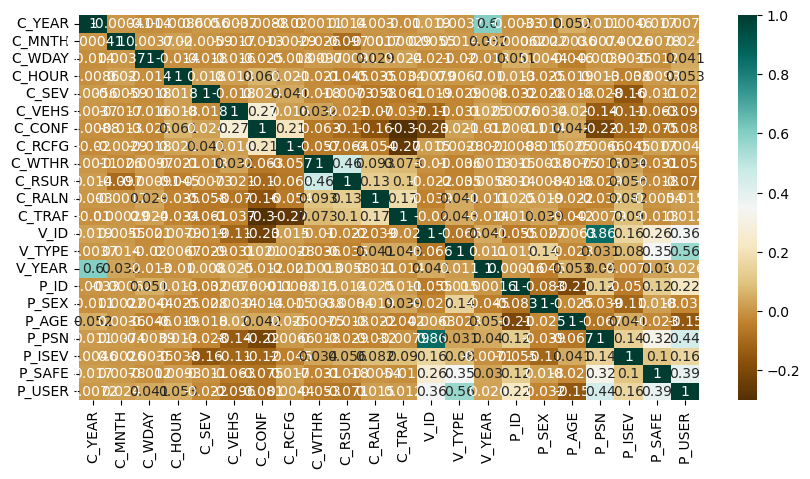

In [22]:
plt.figure(figsize=(10,5))
correlaciones= car.corr()
sns.heatmap(correlaciones,cmap="BrBG",annot=True)
correlaciones

C:\Users\sergi\AppData\Local\Temp\ipykernel_8952\3831366110.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlaciones, dtype=np.bool)


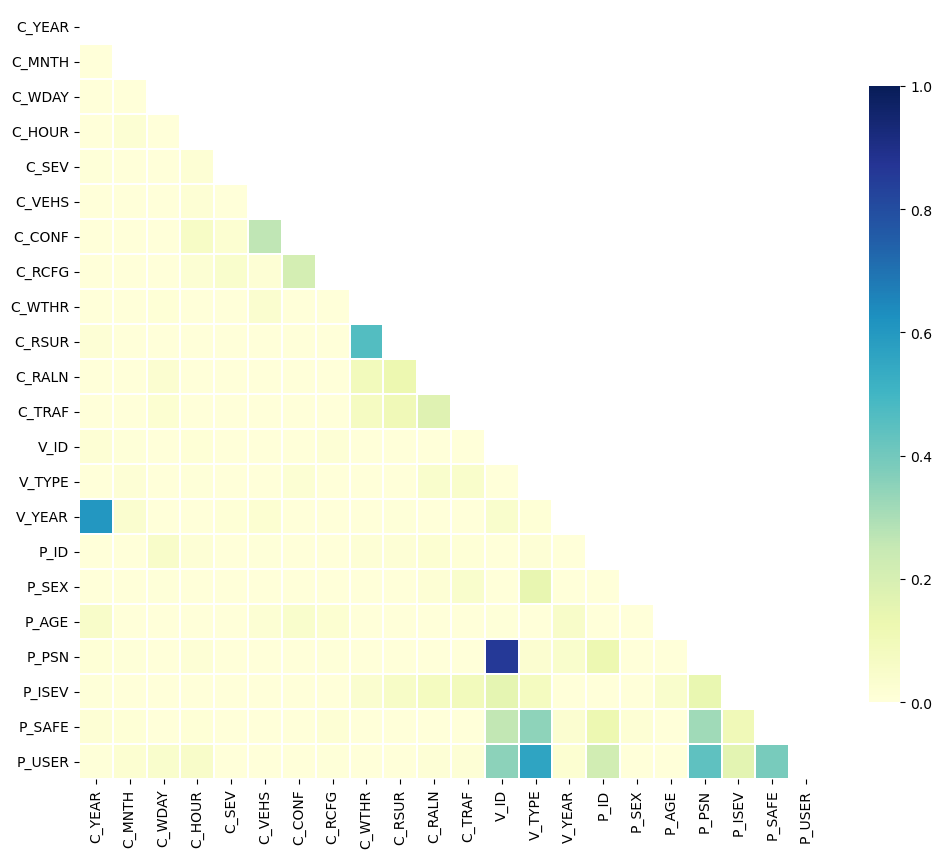

In [23]:
import seaborn as sns

# Generate a mask for the upper triangle
mask = np.zeros_like(correlaciones, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlaciones, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

En este caso son bastante bajas, lo que nos indica que una variable no depende casi de las restantes. También vamos a ver en concreto cuáles son las correlaciones de todas las variables respecto de la que más adelante será nuestra variable objetivo, `C_SEV`

<Axes: >

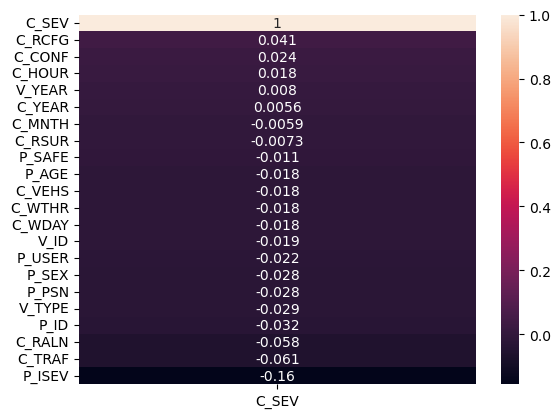

In [24]:
corr = car.corr()[['C_SEV']].sort_values(by='C_SEV', ascending=False)
sns.heatmap(corr, annot=True)

Vemos que las correlaciones son bastante bajas, por lo que el criterio de las correlaciones en principio no nos será válido a la hora de seleccionar las variables que emplearemos en nuestro problema de clasificación. Puede que esta correlación sea tan baja debido a un posible desbalanceo en nuestra variable objetivo, ya que al devolver 1 o 2 según si ha habido muertes o no, lo más probable es que no las haya y, por tanto, exista tal desbalanceo. Lo comprobamos a continuación:

In [25]:
car['C_SEV'].value_counts()

2.0    5755198
1.0      98616
Name: C_SEV, dtype: int64

De las casi seis millones de observaciones, tenemos que casi en su totalidad no hay muertes en los accidentes, por lo que claramente la variable objetivo está desbalanceada. Por ello, a continuación llevamos a cabo un undersampling y un oversampling para corregir tal desbalanceo y obtenemos de nuevo las correlaciones respecto de la variable objetivo para ver si se han mejorado o no. Mediante el método del oversampling, añadimos observaciones "inventadas" del dato con pocos valores, para tener entonces un mayor balanceo. Por tanto, será un método menos realista debido a la inclusión de observaciones que no existen, aunque en principio aporta mejores resultados a la hora de clasificar. Por otro lado, el undersampling elimina observaciones de la clase mayoritaria, quedándonos los valores balanceados. Es más realista pero tendrá peores resultados al estar perdiendo información.

###### Oversampling 

In [26]:
#Oversampling
from imblearn.over_sampling import SMOTE

ros = SMOTE(random_state = 0)
X_res, y_res = ros.fit_resample(car[['C_YEAR', 'C_MNTH', 'C_WDAY',
       'C_HOUR', 'C_SEV', 'C_VEHS',
       'C_CONF', 'C_RCFG', 'C_WTHR',
       'C_RSUR', 'C_RALN', 'C_TRAF',
       'V_ID', 'V_TYPE', 'V_YEAR',
       'P_ID', 'P_SEX',
       'P_AGE', 'P_PSN',
       'P_ISEV', 'P_SAFE',
       'P_USER']], car[['C_SEV']])
print('Filas totales:' , len(y_res))

Filas totales: 11510396


In [27]:
car_oversampled = pd.DataFrame(X_res)
car_oversampled['C_SEV']=y_res

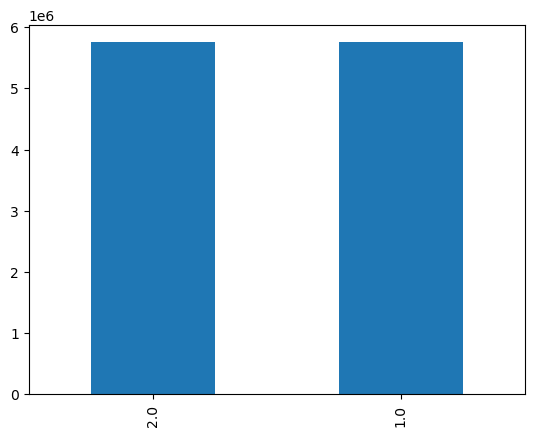

In [28]:
car_oversampled['C_SEV'].value_counts().plot.bar()
plt.show()

Las correlaciones respecto de nuestra variable objetivo nos queda de la siguiente forma:

<Axes: >

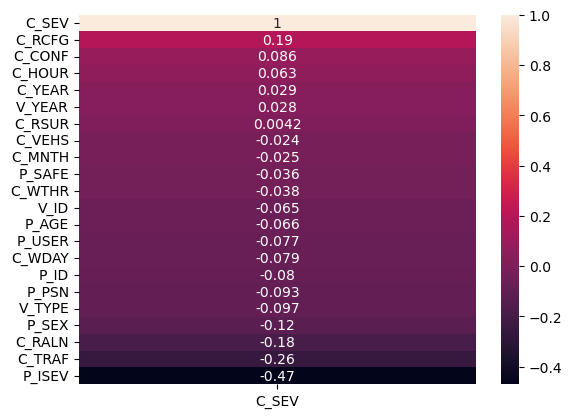

In [29]:
corr1 = car_oversampled.corr()[['C_SEV']].sort_values(by='C_SEV', ascending=False)
sns.heatmap(corr1, annot=True)

###### Undersampling

In [30]:
#Undersampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 0)
X_rus, y_rus = rus.fit_resample(car[['C_YEAR', 'C_MNTH', 'C_WDAY',
       'C_HOUR', 'C_SEV', 'C_VEHS',
       'C_CONF', 'C_RCFG', 'C_WTHR',
       'C_RSUR', 'C_RALN', 'C_TRAF',
       'V_ID', 'V_TYPE', 'V_YEAR',
       'P_ID', 'P_SEX',
       'P_AGE', 'P_PSN',
       'P_ISEV', 'P_SAFE',
       'P_USER']], car[['C_SEV']])
print('Filas totales:', len(rus.sample_indices_))

Filas totales: 197232


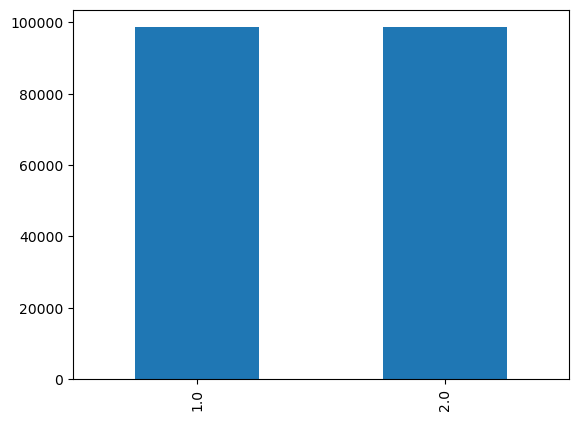

In [31]:
car_undersampled = pd.DataFrame(X_rus)
car_undersampled['C_SEV']=y_rus
car_undersampled['C_SEV'].value_counts().plot.bar()
plt.show()

En cuanto a las correlaciones:

<Axes: >

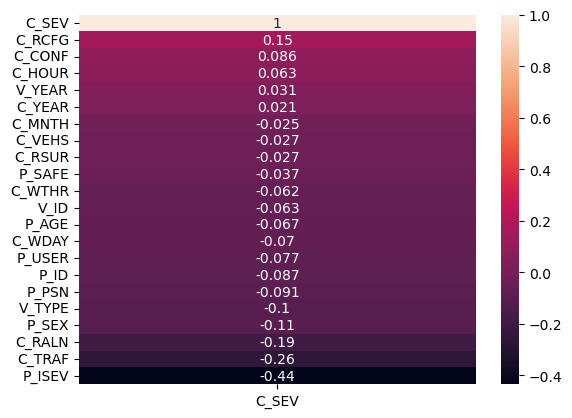

In [32]:
corr2 = car_undersampled.corr()[['C_SEV']].sort_values(by='C_SEV', ascending=False)
sns.heatmap(corr2, annot=True)

En ambos casos, las correlaciones mejoran pero no lo suficiente como para ser un criterio definitivo a la hora de seleccionar las variables más útiles para luego clasificar, así que tendremos que emplear otros métodos de selección de variables. Además, podemos observar que los valores son prácticamente idénticos, por lo que para ahorrarnos coste computacional (con el oversampling se tienen más de 11 millones de observaciones) trabajaremos con la muestra del undersampling, aún exponiéndonos a perder algo de precisión en las clasificaciones por los motivos ya descritos.

### Algunos gráficos

A continuación, llevamos a cabo una exploración gráfica en donde vamos a ver como se distribuye nuestra variable objetivo respecto de las otras variables, para ver si hay más casos de accidentes con muerte o sin ellas, según algunas condiciones como el día de la semana, hora del día, tipo de vehículo o medidas de seguridad utilizadas. Emplearemos los datos balanceados previamente mediante el método de undersampling. Comentaremos un par de ellos:

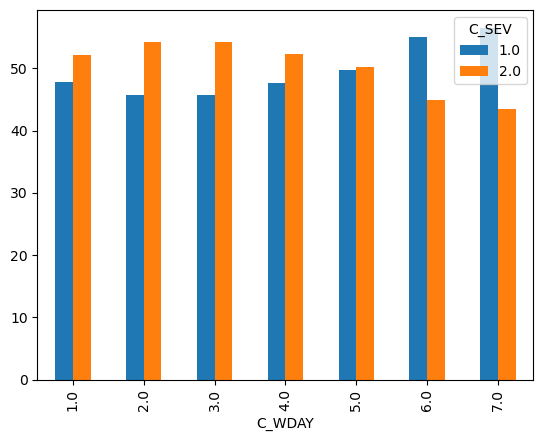

In [33]:
plot = pd.crosstab(index=car_undersampled['C_WDAY'],
            columns=car_undersampled['C_SEV']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

En este gráfico estamos viendo por día de la semana de la distribución de accidentes con y sin muertos. Se puede ver que el fin de semana hay más accidentes con muertes y el viernes está a la par, lo que nos quiere decir que en la realidad, aunque la mayor parte de las veces no haya muertos, el número de siniestros con un fallecimiento es mayor los fines de semana, lo cual es lógico teniendo en cuenta que la gente sale más y comete mayores imprudencias, como conducir bajo los efectos del alcohol o drogas, cansancio y demás. En cambio, el resto de la semana es al revés.

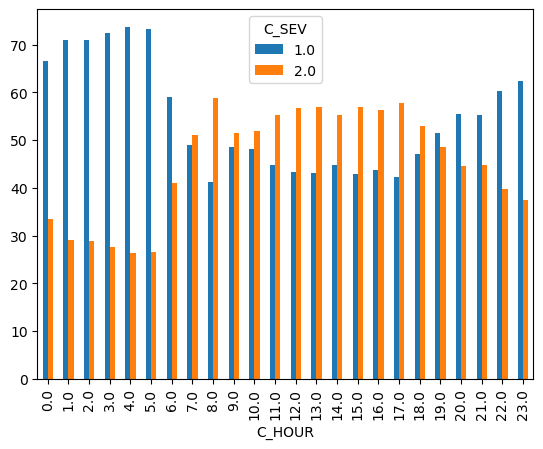

In [34]:
plot = pd.crosstab(index=car_undersampled['C_HOUR'],
            columns=car_undersampled['C_SEV']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

Aquí observamos que en las horas centrales del día es donde menor proporción de fallecimientos hay, lo que es normal porque es cuando mayor volumen de tráfico hay y también son horas en las que es menos probable que un conductor cometa imprudencias como las comentadas anteriormente.

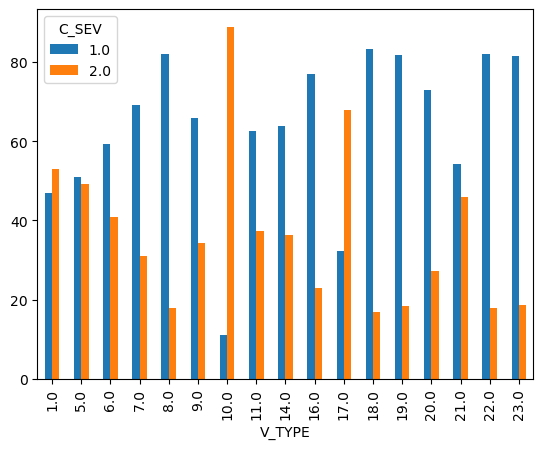

In [35]:
plot = pd.crosstab(index=car_undersampled['V_TYPE'],
            columns=car_undersampled['C_SEV']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

En cuanto al tipo de vehículo, destaca que los buses escolares no tienen casi accidentes con víctimas mortales, algo lógico al tratarse de un vehículo que circula a pocas velocidades y casi siempre por ciudades o pueblos. Otro vehículo con menor cantidad de accidentes mortales son las bicicletas. Por otro lado, el vehículo con más accidentes mortales es el tractor de carretera, seguido de cerca por otros como motos, caravanas, coches convencionales o motos de nieve.

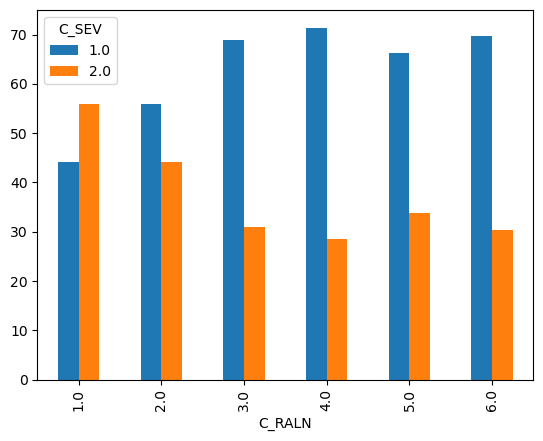

In [36]:
plot = pd.crosstab(index=car_undersampled['C_RALN'],
            columns=car_undersampled['C_SEV']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

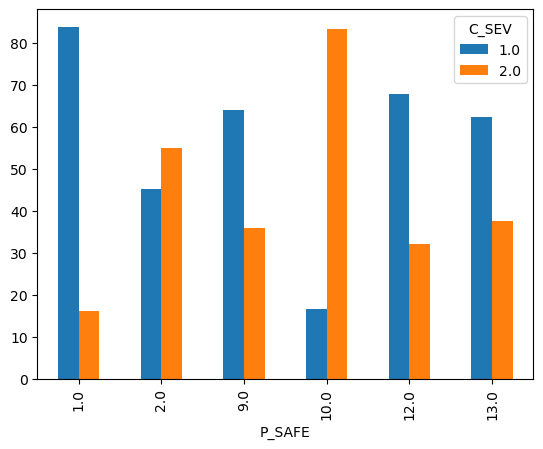

In [37]:
plot = pd.crosstab(index=car_undersampled['P_SAFE'],
            columns=car_undersampled['C_SEV']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

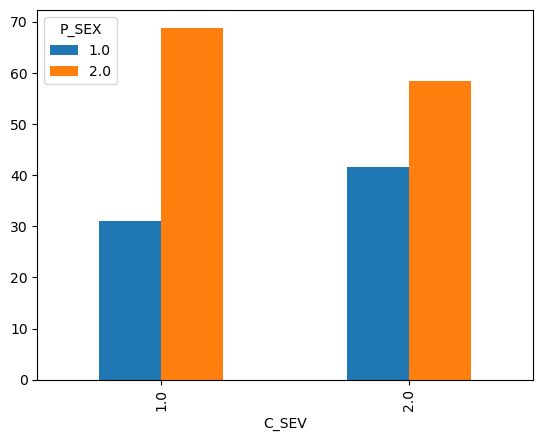

In [38]:
plot = pd.crosstab(index=car_undersampled['C_SEV'],
            columns=car_undersampled['P_SEX']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

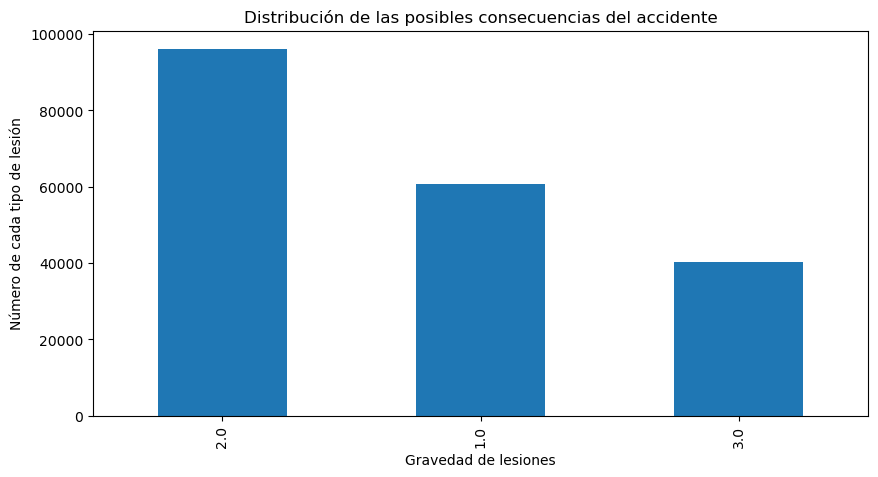

In [39]:
car_undersampled['P_ISEV'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Distribución de las posibles consecuencias del accidente")
plt.ylabel('Número de cada tipo de lesión')
plt.xlabel('Gravedad de lesiones');

<Axes: xlabel='C_SEV', ylabel='C_CONF'>

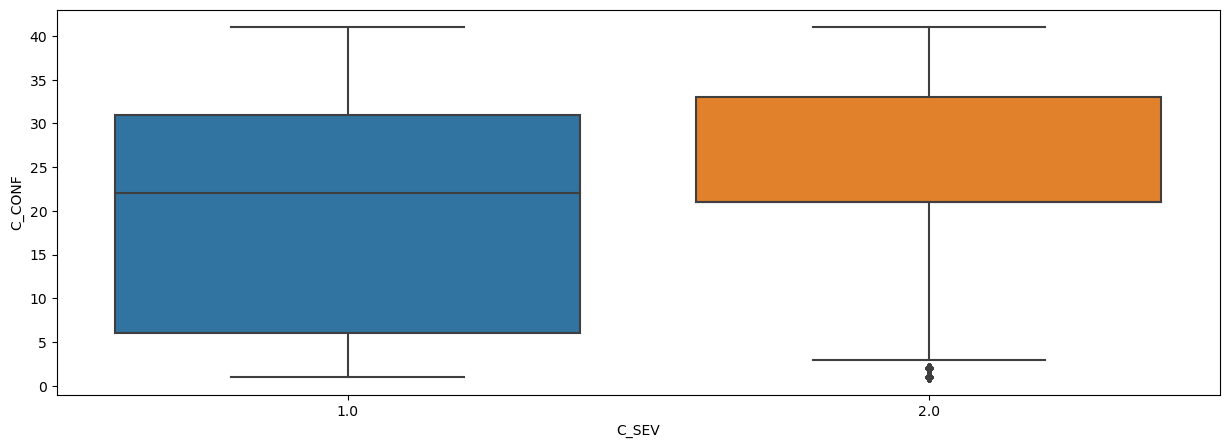

In [40]:
plt.figure(figsize=(15,5))
sns.boxplot(x='C_SEV',y='C_CONF',data=car_undersampled)

En este gráfico de cajas, relacionamos los accidentes con su configuración, es decir, con la forma en la que se han producido dichos percances. En cuanto a los accidentes sin muertos, vemos que la caja junto con las patillas abarcan prácticamente todos los tipos de configuraciones, lo cual es normal porque en esta variable tenemos desde choques con señales de tráfico hasta colisiones entre dos vehículos en marcha. En cambio, para los accidentes con algún fallecido, vemos que la caja engloba aproximadamente los tipos de accidente entre el 21 y el 35, lo cual es lógico al tratarse de los accidentes más peligrosos por ser choques entre vehículos que van tanto en la misma dirección como en la contraria

Por último, vemos un histograma de cada una de las variables que componen el dataset con los datos ya balanceados, en este caso, mediante el método del undersampling:

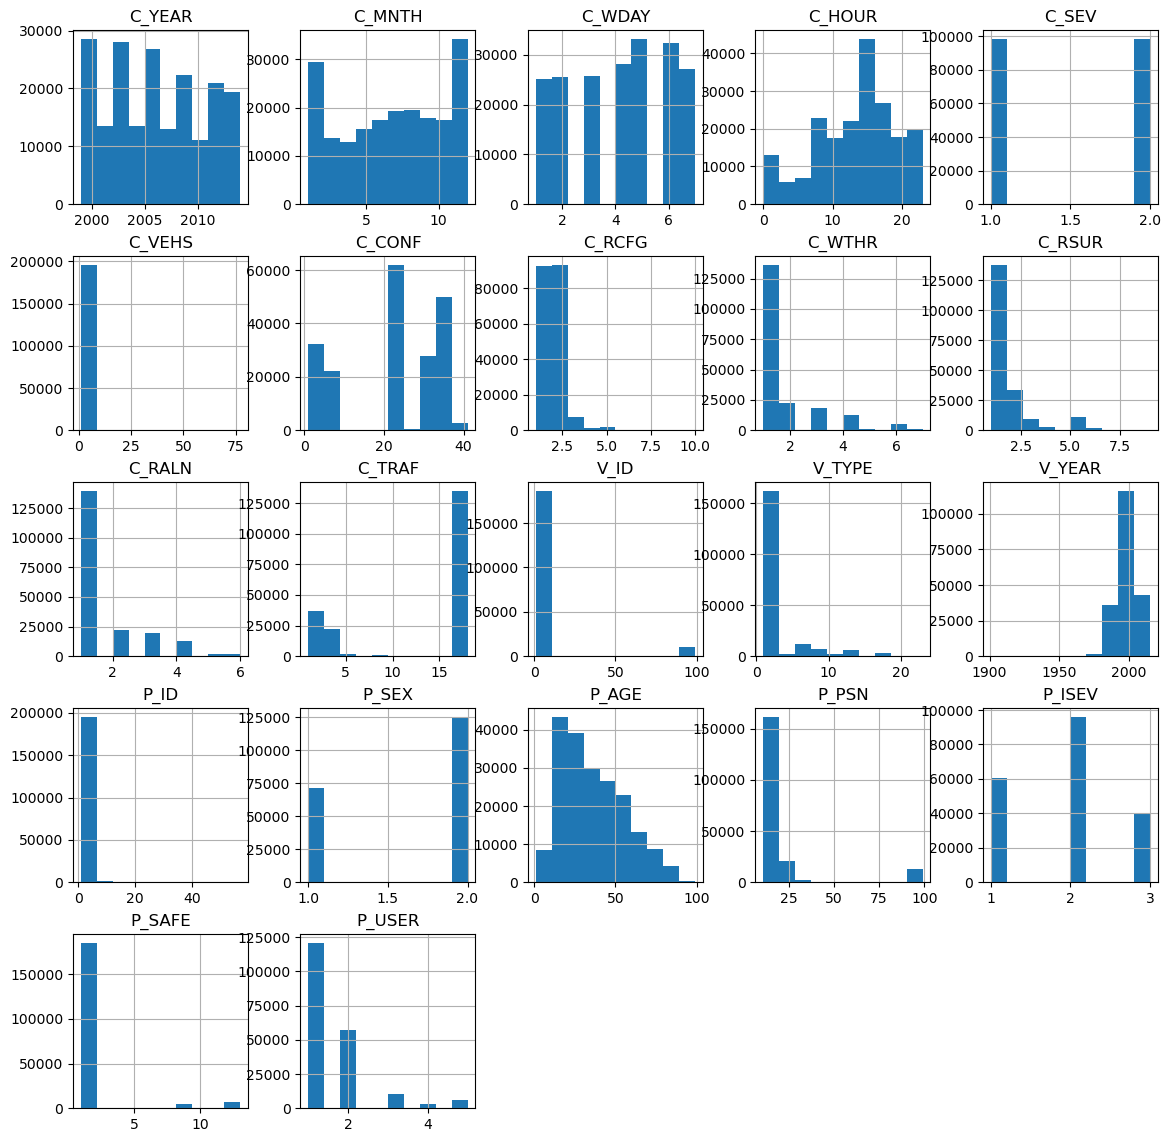

In [41]:
car_undersampled.hist(figsize=(14,14), rwidth=3)
plt.show()

### Selección de variables

Como ya hemos mencionado anteriormente, las correlaciones no van a ser un criterio útil a la hora de seleccionar las variables que emplearemos para clasificar debido a sus bajos valores y, por ello, la dificultad para poder elegir correctamente y con buen criterio las variables. Será entonces necesario emplear otros métodos de selección de variables, en nuestro caso, mediante un filtrado de variables. Este método compara cada variable con respecto de la variable objetivo y le asigna una puntuación. Nos quedaremos entonces con aquellas variables con la puntuación más alta. Existen dos formas de filtrado: mediante un test de la F de Snedecor, que es más preciso para conjuntos de datos con pocas observaciones y mediante la información mutua, que es utilizado con mayor número de observaciones y será el criterio que tendremos en cuenta en esta práctica.

In [42]:
X = car_undersampled.iloc[:, [0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
y = car_undersampled['C_SEV'].values
feature_names = car_undersampled.columns.values
Feature_names = car_undersampled.iloc[:, [0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].columns.values

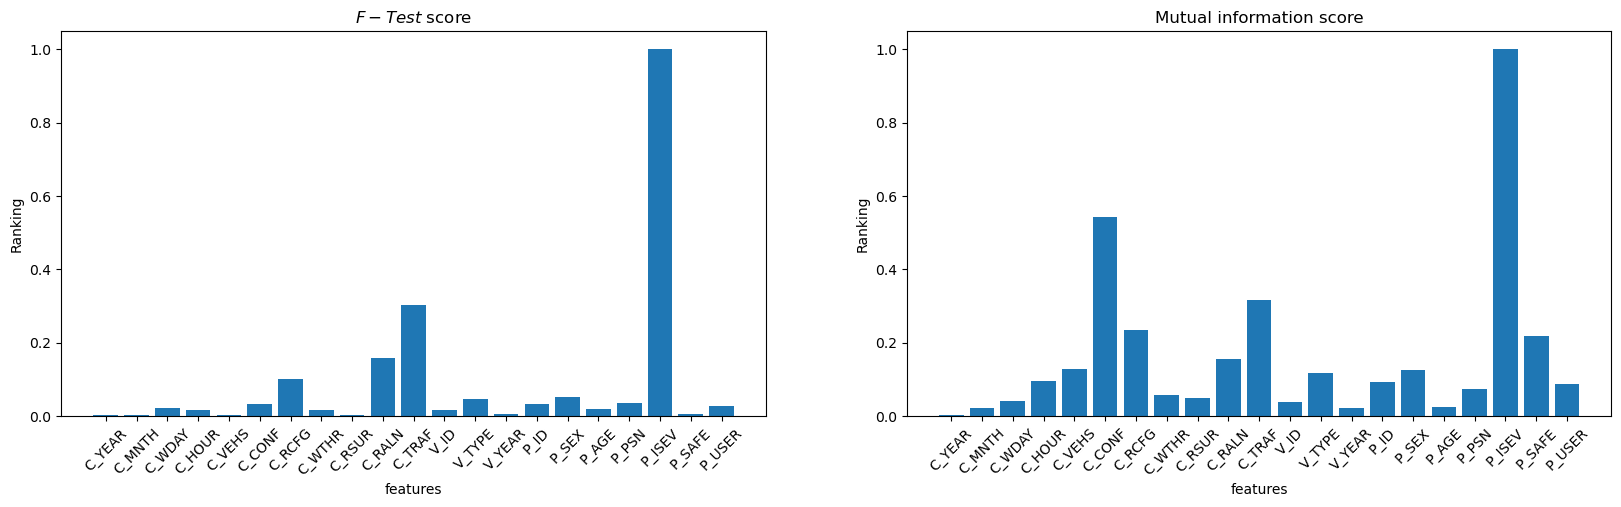

In [43]:
from sklearn.feature_selection import f_classif, mutual_info_classif

f_test, _ = f_classif(X, y)
f_test /= np.max(f_test)

mi = mutual_info_classif(X, y)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),Feature_names, rotation = 45)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F-Test$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi,  align="center")
plt.xticks(range(X.shape[1]),Feature_names, rotation = 45)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

Nos quedamos entonces con las variables `C_SEV`, `C_CONF`, `C_RCFG`, `C_RALN`, `C_TRAF`, `V_TYPE`, `P_ISEV`, `P_SAFE`

In [44]:
car1 = car_undersampled.drop(['C_YEAR','C_MNTH','C_WDAY','C_HOUR','C_VEHS','C_WTHR','C_RSUR','V_ID','V_YEAR','P_ID','P_SEX','P_AGE','P_PSN','P_USER'], axis=1)

La tabla final con todas las variables con las que vamos a realizar el problema de clasificación sería la siguiente:

In [45]:
car1

,C_SEV,C_CONF,C_RCFG,C_RALN,C_TRAF,V_TYPE,P_ISEV,P_SAFE
0,1.0,4.0,2.0,4.0,18.0,6.0,3.0,2.0
1,1.0,1.0,2.0,1.0,6.0,1.0,1.0,2.0
2,1.0,1.0,2.0,1.0,6.0,1.0,3.0,2.0
3,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0
4,1.0,1.0,2.0,1.0,1.0,1.0,3.0,2.0
...,...,...,...,...,...,...,...,...
197227,2.0,21.0,2.0,2.0,18.0,1.0,1.0,2.0
197228,2.0,33.0,2.0,1.0,18.0,1.0,2.0,2.0
197229,2.0,35.0,2.0,1.0,1.0,1.0,2.0,2.0
197230,2.0,23.0,2.0,1.0,18.0,1.0,2.0,2.0


### Datos de entrenamiento y test

In [46]:
y1 = car1['C_SEV'].values
X1 = car1.iloc[:,1:].values

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((157785, 7), (39447, 7))

# 2. Modelos de clasificación

Es el momento de aplicar los distintos métodos pedidos para obtener las predicciones de la variable `C_SEV` en función de las variables con las que nos hemos quedado en apartados anteriores. Vamos a aplicar métodos de clasificación. Lo primero de todo es llevar a cabo un escalado de los datos para evitar problemas de unidades y que, así, todos los datos estén en la misma escala.

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
import pandas as pd

df = pd.DataFrame()

# creamos las columnas
df['1'] = None
df['0'] = None

# añadimos filas por su nombre de fila
df.loc['1'] = ['TP', 'FP']
df.loc['0'] = ['FN','TN']


print(df)

    1   0
1  TP  FP
0  FN  TN


En esta tabla, los números de la primera columna, representan los valores predichos, mientras que los valores de la primera fila, representan los valores reales.

* TP (True Positive): Son los valores que el algoritmo clasifica como positivos y que realmente son positivos.
* TN (True Negative): Son valores que el algoritmo clasifica como negativos (0 en este caso) y que realmente son negativos.
* FP (False Positive): Falsos positivos, es decir, valores que el algoritmo clasifica como positivo cuando realmente son negativos.
* FN (False Negative): Falsos negativos, es decir, valores que el algoritmo clasifica como negativo cuando realmente son positivos.

Esta matriz es la base sobre la que se construyen todas las métricas de clasificación, que son las descritas a continuación:
* **Accuracy**: Representa el porcentaje total de valores correctamente clasificados, tanto positivos como negativos. Es recomendable utilizar esta métrica en problemas en los que los datos están balanceados, es decir, que haya misma cantidad de valores de cada clase, como es en nuestro caso. El problema con esta métrica es que nos puede llevar al engaño, es decir, puede hacer que un modelo malo parezca que es mucho mejor de lo que es. Su fórmula es Accuracy = (TP + TN) / (TP + TN + FP + FN)
* **Matriz de confusión**: Es una matriz en la que cada columna representa el número de predicciones de cada clase, mientras que cada fila representa las instancias en la clase real. Uno de los beneficios de las matrices de confusión es que facilitan ver si el sistema está confundiendo dos clases. Por tanto, los elementos que se encuentran en la diagonal serán aquellos en los que la clasificación es correcta, mientras que el resto de valores representan los errores. Por ejemplo, en la posición 1,2 tendremos que hemos predicho 2 cuando el valor real es 1 y en la posición 1,1 los valores 1 que hemos predicho como 1, es decir, un acierto. Por tanto, cuanto más valores haya en la diagonal, mejor estaremos clasificando. Mediante el accuracy podemos ver cuál es su grado de acierto. Nota: al hacer el gráfico aparece 0,1 en vez de 1 y 2, respectivamente.
* **Precision**: Calcula el porcentaje de valores que se han clasificado como positivos siendo realmente positivos. Su fórmula es Precision = TP / (TP + FP).
* **Recall**: También conocida como el ratio de verdaderos positivos, es utilizada para saber cuantos valores positivos son correctamente clasificados. Su fórmula es Recall = TP / (TP + FN).
* **F-Score**: El valor F1 se utiliza para combinar las medidas de precision y recall en un sólo valor. Esto es práctico porque hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias soluciones. Esta es una métrica muy utilizada en problemas en los que el conjunto de datos a analizar está desbalanceado, por lo que en nuestro caso concreto no nos será una métrica muy representativa. Se calcula mediante F1 = 2 * ((recall * precision)/(recall + precision))
* **Curva ROC**: Una curva ROC es un gráfico muy utilizado que representa el porcentaje de verdaderos positivos (True Positive Rate), también conocido como Recall, contra el ratio de falsos positivos (False Positive Rate). La diferencia con el resto de métricas, es que en este caso, el umbral por el que se clasifica un elemento como 0 o 1, se va modificando, para poder ir generando todos los puntos de la gráfica. Su valor numérico viene dado por la siguiente métrica.
* **Área bajo la curva (AUC)**: A partir de la gráfica anterior, se puede obtener una métrica sólida, muy útil para problemas de clasificación binaria. El valor de esta métrica se encuentra en un rango entre 0 y 1, donde 0 es como si tuviéramos un modelo aleatorio y 1 es un resultado óptimo que indica que nuestro modelo generaliza muy bien.

In [50]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## 2.1. KNN 

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [52]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
y_pred = knn.predict(X_test)

#### Métricas

In [54]:
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.7589930793216214

array([[15150,  4489],
       [ 5018, 14790]], dtype=int64)

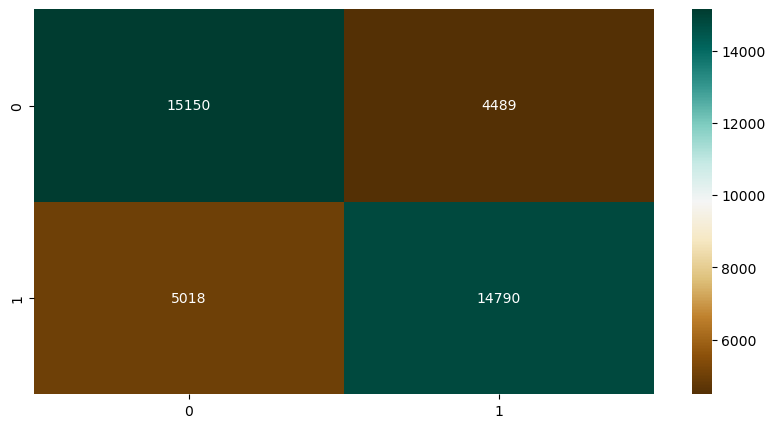

In [55]:
CM=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(CM,cmap="BrBG",annot=True,fmt='2g')
CM

In [56]:
prec = precision_score(y_test, y_pred)
prec

0.7511900039666799

In [57]:
rec = recall_score(y_test, y_pred)
rec

0.77142420693518

In [58]:
f1 = f1_score(y_test, y_pred)
f1

0.7611726580752128

In [59]:
def plot_roc_curve(test_y, pred_y):
    # Tasa de falsos positivos, tasa de verdaderos positivos
    fprs, tprs, thresholds = roc_curve(test_y, pred_y, pos_label=1)

    # gráfico ROC-AUC
    plt.figure(figsize=(8, 8))
    plt.plot([0, 1], [0, 1], linestyle="-", c="k", alpha=0.2, label="ROC-AUC=0.5")
    plt.plot(fprs, tprs, color="orange", label="ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    # Rellene el área correspondiente a la puntuación ROC-AUC
    y_zeros = [0 for _ in tprs]
    plt.fill_between(fprs, y_zeros, tprs, color="orange", alpha=0.3, label="ROC-AUC")
    plt.legend()
    plt.show()

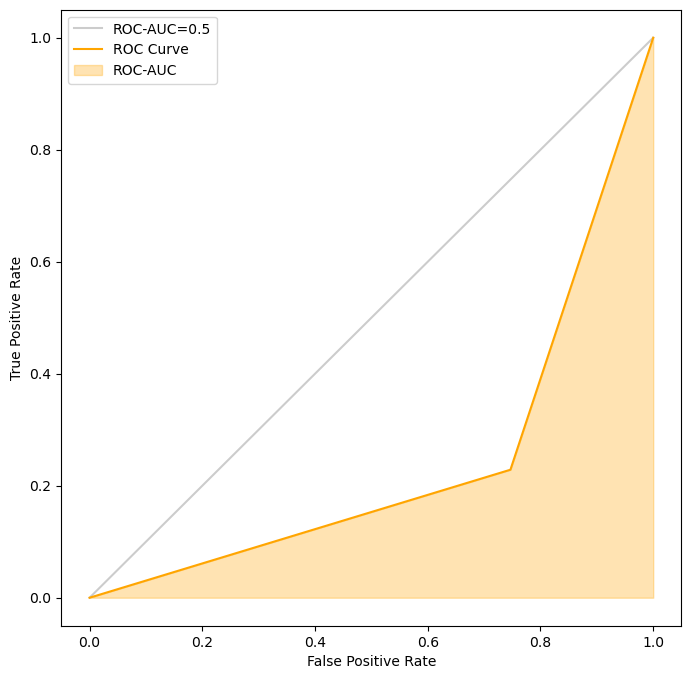

In [60]:
plot_roc_curve(y_test, y_pred)

In [61]:
roc_auc_score(y_test, y_pred)

0.7590461099296255

In [62]:
data = {'Métrica': ['Accuracy', 'Precisión', 'Recall', 'F1-score'],
        'Valor': [acc, prec, rec, f1]}
df = pd.DataFrame(data)
print(df)

     Métrica     Valor
0   Accuracy  0.758993
1  Precisión  0.751190
2     Recall  0.771424
3   F1-score  0.761173


## 2.2. Árbol de decisión

In [63]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(max_depth=8)
arbol

DecisionTreeClassifier(max_depth=8)

In [64]:
arbol.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [65]:
y_pred = arbol.predict(X_test)

#### Métricas

In [66]:
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.7935457702740386

array([[13498,  6141],
       [ 2003, 17805]], dtype=int64)

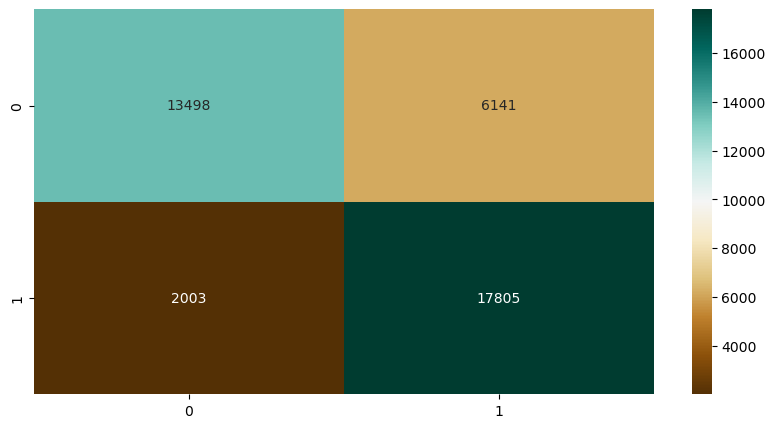

In [67]:
CM=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(CM,cmap="BrBG",annot=True,fmt='2g')
CM

In [68]:
prec = precision_score(y_test, y_pred)
prec

0.8707825301593446

In [69]:
rec = recall_score(y_test, y_pred)
rec

0.687305870971027

In [70]:
f1 = f1_score(y_test, y_pred)
f1

0.7682413204325554

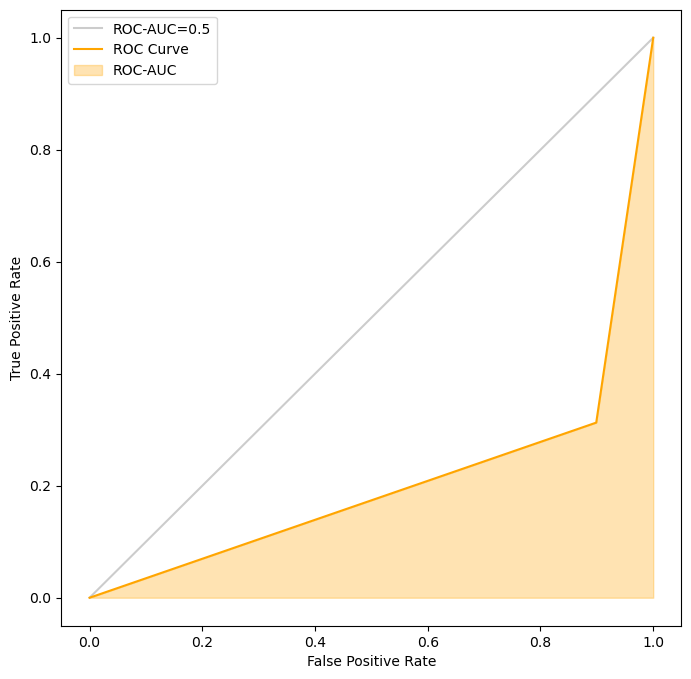

In [71]:
plot_roc_curve(y_test, y_pred)

In [72]:
roc_auc_score(y_test, y_pred)

0.7930925558409254

In [73]:
data = {'Métrica': ['Accuracy', 'Precisión', 'Recall', 'F1-score'],
        'Valor': [acc, prec, rec, f1]}
df = pd.DataFrame(data)
print(df)

     Métrica     Valor
0   Accuracy  0.793546
1  Precisión  0.870783
2     Recall  0.687306
3   F1-score  0.768241


## 2.3. Bagging

In [74]:
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier(base_estimator=None, n_estimators=10)
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=None)

In [75]:
y_pred = bag.predict(X_test)

#### Métricas

In [76]:
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.7999087383070956

array([[14120,  5519],
       [ 2374, 17434]], dtype=int64)

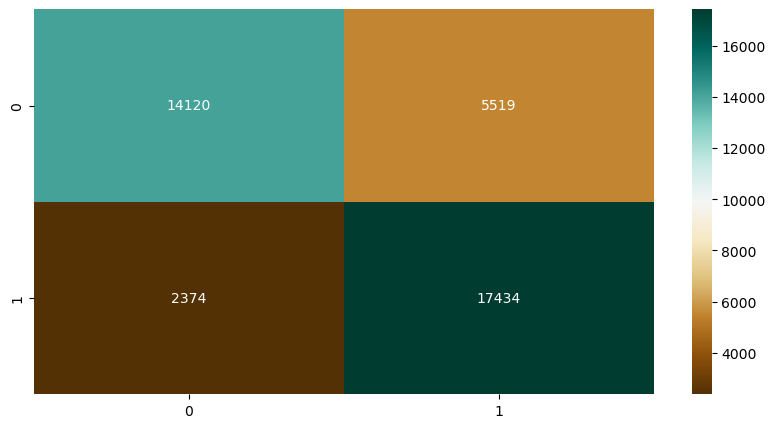

In [77]:
CM=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(CM,cmap="BrBG",annot=True,fmt='2g')
CM

In [78]:
prec = precision_score(y_test, y_pred)
prec

0.8560688735297683

In [79]:
rec = recall_score(y_test, y_pred)
rec

0.7189775446815011

In [80]:
f1 = f1_score(y_test, y_pred)
f1

0.781557025433814

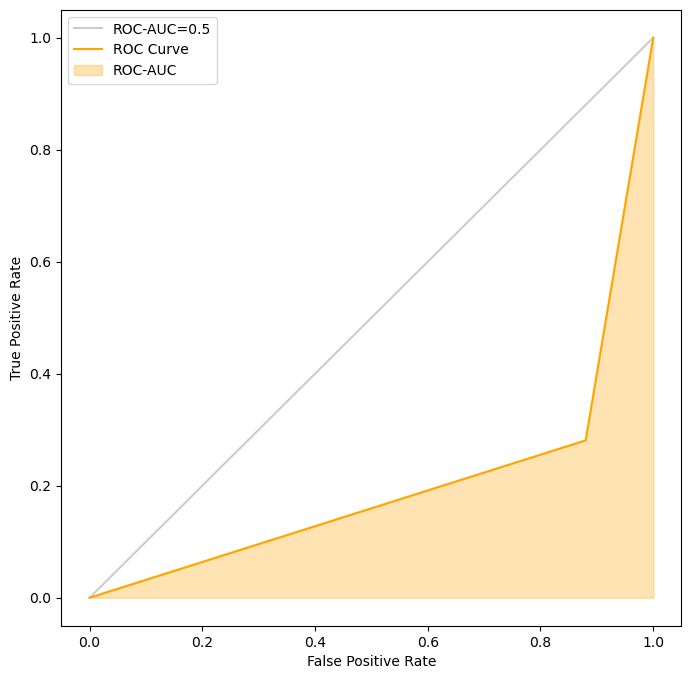

In [81]:
plot_roc_curve(y_test, y_pred)

In [82]:
roc_auc_score(y_test, y_pred)

0.7995634896266955

In [83]:
data = {'Métrica': ['Accuracy', 'Precisión', 'Recall', 'F1-score'],
        'Valor': [acc, prec, rec, f1]}
df = pd.DataFrame(data)
print(df)

     Métrica     Valor
0   Accuracy  0.799909
1  Precisión  0.856069
2     Recall  0.718978
3   F1-score  0.781557


## 2.4. Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [85]:
y_pred = rf.predict(X_test)

#### Métricas

In [86]:
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.8011002104089031

array([[14083,  5556],
       [ 2290, 17518]], dtype=int64)

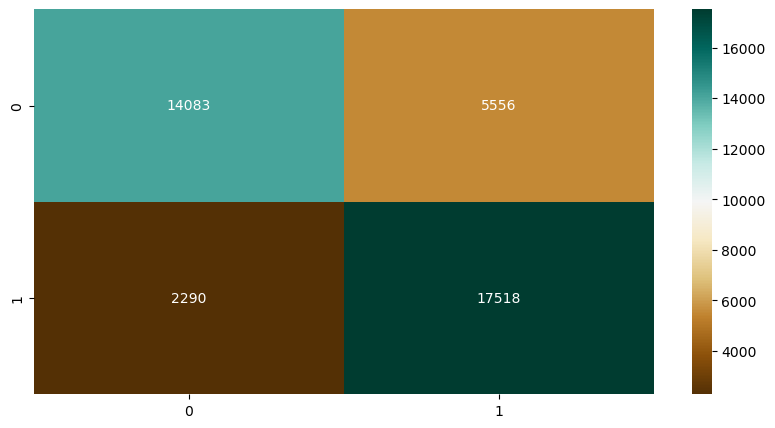

In [87]:
CM=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(CM,cmap="BrBG",annot=True,fmt='2g')
CM

In [88]:
prec = precision_score(y_test, y_pred)
prec

0.8601355890795822

In [89]:
rec = recall_score(y_test, y_pred)
rec

0.717093538367534

In [90]:
f1 = f1_score(y_test, y_pred)
f1

0.7821281794957237

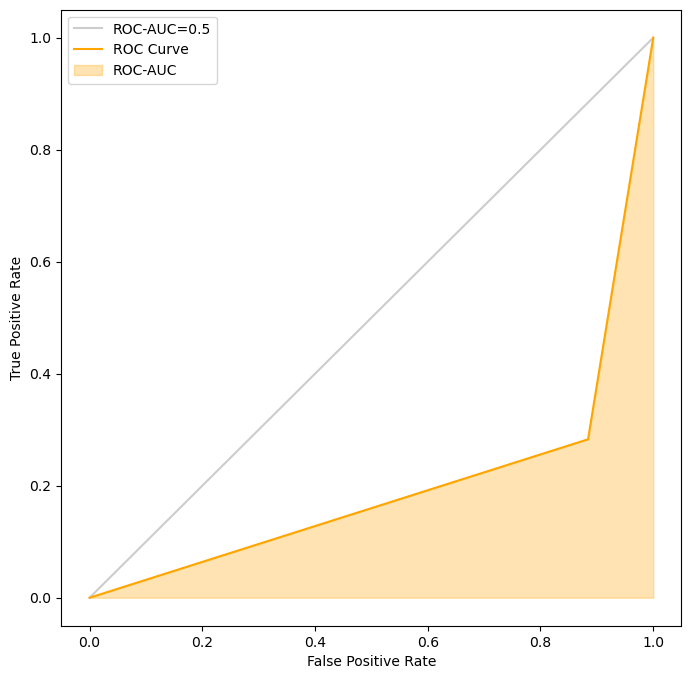

In [91]:
plot_roc_curve(y_test, y_pred)

In [92]:
roc_auc_score(y_test, y_pred)

0.8007418418816669

In [93]:
data = {'Métrica': ['Accuracy', 'Precisión', 'Recall', 'F1-score'],
        'Valor': [acc, prec, rec, f1]}
df = pd.DataFrame(data)
print(df)

     Métrica     Valor
0   Accuracy  0.801100
1  Precisión  0.860136
2     Recall  0.717094
3   F1-score  0.782128


## 2.5. Gradient Boost

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(random_state=0)
grad.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [95]:
y_pred = grad.predict(X_test)

#### Métricas

In [96]:
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.792227545820975

array([[13736,  5903],
       [ 2293, 17515]], dtype=int64)

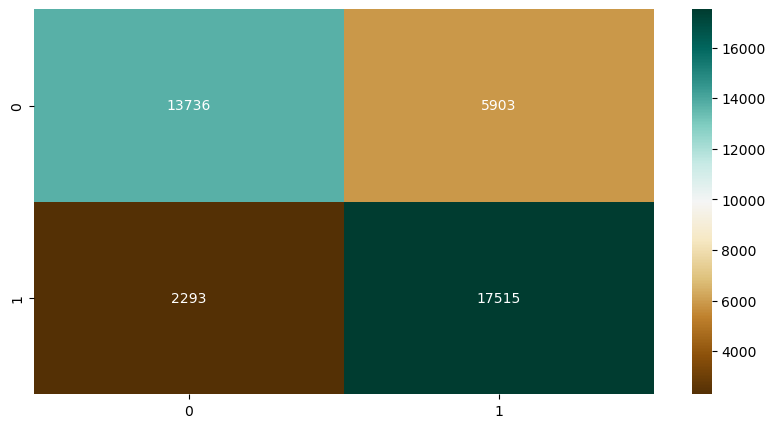

In [97]:
CM=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(CM,cmap="BrBG",annot=True,fmt='2g')
CM

In [98]:
prec = precision_score(y_test, y_pred)
prec

0.8569467839540832

In [99]:
rec = recall_score(y_test, y_pred)
rec

0.6994246142878965

In [100]:
f1 = f1_score(y_test, y_pred)
f1

0.7702141976000896

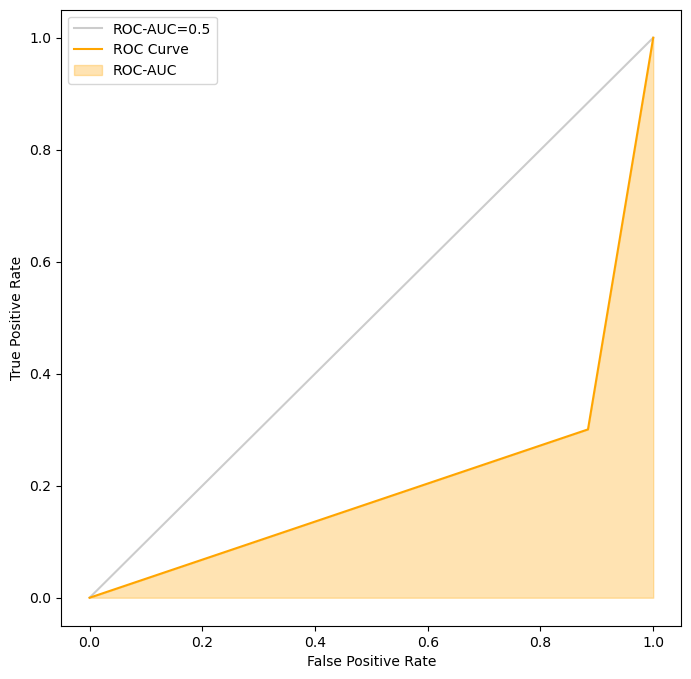

In [101]:
plot_roc_curve(y_test, y_pred)

In [102]:
roc_auc_score(y_test, y_pred)

0.7918316528628497

In [103]:
data = {'Métrica': ['Accuracy', 'Precisión', 'Recall', 'F1-score'],
        'Valor': [acc, prec, rec, f1]}
df = pd.DataFrame(data)
print(df)

     Métrica     Valor
0   Accuracy  0.792228
1  Precisión  0.856947
2     Recall  0.699425
3   F1-score  0.770214


## 2.6. XGBoost

In [104]:
import numpy as np

valor_antiguo = 1
nuevo_valor = 0

y_train = np.where(y_train == valor_antiguo, nuevo_valor, y_train)

valor_antiguo1 = 2
nuevo_valor1 = 1


y_train = np.where(y_train == valor_antiguo1, nuevo_valor1, y_train)


In [105]:
valor_antiguo2 = 1
nuevo_valor2 = 0

y_test = np.where(y_test == valor_antiguo2, nuevo_valor2, y_test)

valor_antiguo3 = 2
nuevo_valor3 = 1


y_test = np.where(y_test == valor_antiguo3, nuevo_valor3, y_test)

In [106]:
import xgboost as xgb

In [107]:
from xgboost import XGBClassifier

In [108]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [109]:
y_pred = xgb.predict(X_test)

#### Métricas

In [110]:
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.8027226405049813

array([[13916,  5723],
       [ 2059, 17749]], dtype=int64)

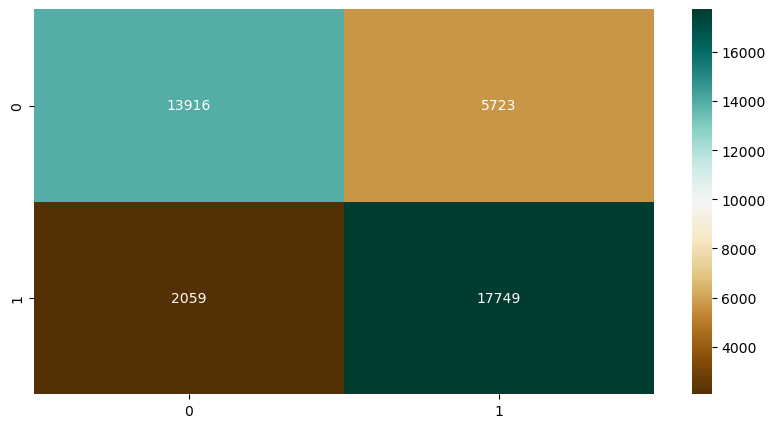

In [111]:
CM=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(CM,cmap="BrBG",annot=True,fmt='2g')
CM

In [112]:
prec = precision_score(y_test, y_pred)
prec

0.7561775732788003

In [113]:
rec = recall_score(y_test, y_pred)
rec

0.8960521001615509

In [114]:
f1 = f1_score(y_test, y_pred)
f1

0.8201940850277265

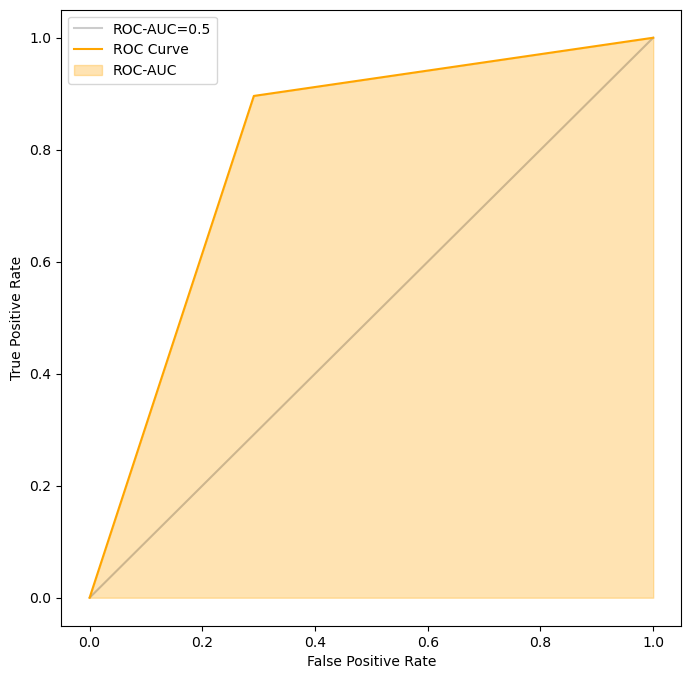

In [115]:
plot_roc_curve(y_test, y_pred)

In [116]:
roc_auc_score(y_test, y_pred)

0.8023210752857248

In [117]:
data = {'Métrica': ['Accuracy', 'Precisión', 'Recall', 'F1-score'],
        'Valor': [acc, prec, rec, f1]}
df = pd.DataFrame(data)
print(df)

     Métrica     Valor
0   Accuracy  0.802723
1  Precisión  0.756178
2     Recall  0.896052
3   F1-score  0.820194


## 2.7. Regresión Logística

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [119]:
y_pred = clf.predict(X_test)

#### Métricas

In [120]:
acc = accuracy_score(y_test, y_pred)
acc

0.685552767003828

array([[14014,  5625],
       [ 6779, 13029]], dtype=int64)

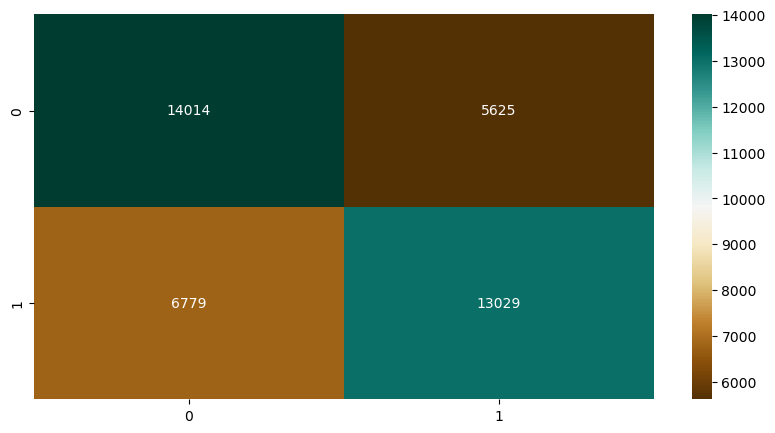

In [121]:
CM=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(CM,cmap="BrBG",annot=True,fmt='2g')
CM

In [122]:
prec = precision_score(y_test, y_pred)
prec

0.6984560952074622

In [123]:
rec = recall_score(y_test, y_pred)
rec

0.6577645395799677

In [124]:
f1 = f1_score(y_test, y_pred)
f1

0.67749987000156

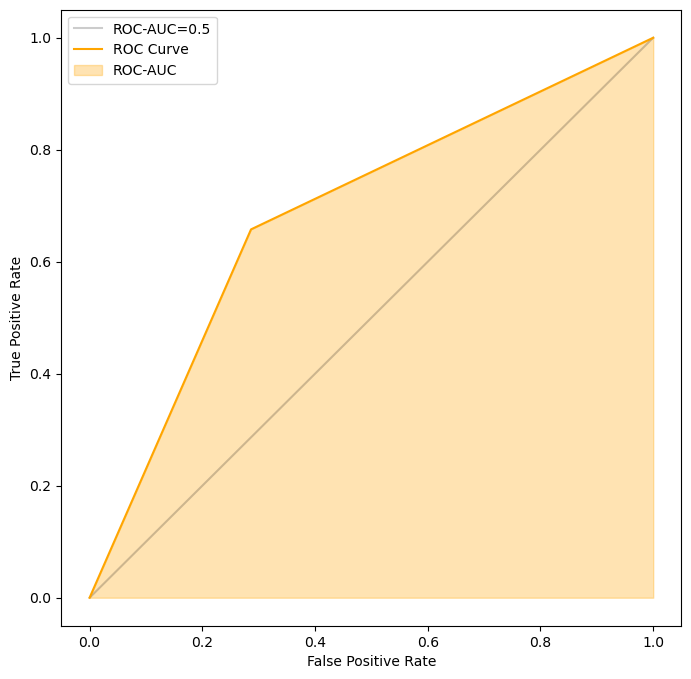

In [125]:
plot_roc_curve(y_test, y_pred)

In [126]:
roc_auc_score(y_test, y_pred)

0.6856723303837005

In [127]:
data = {'Métrica': ['Accuracy', 'Precisión', 'Recall', 'F1-score'],
        'Valor': [acc, prec, rec, f1]}
df = pd.DataFrame(data)
print(df)

     Métrica     Valor
0   Accuracy  0.685553
1  Precisión  0.698456
2     Recall  0.657765
3   F1-score  0.677500


# 3. Métrica más conveniente y métodos ordenados según esa métrica

Una vez explicadas todas las métricas, así como obtenidos todos sus valores para cada una de las métricas, tenemos que decidir cuál de ellas será la más conveniente para llevar a cabo la predicción. Como tenemos datos balanceados, descartamos directamente el `F-Score`al ser más empleada con datos desbalanceados. Por otro lado, las métricas `Precision`y `Recall`se centran en ver la precisión de los positivos clasificados, olvidándose de los negativos. Como queremos tener una visión global de los aciertos, estas métricas no nos serán tan útiles, por lo que también la descartamos. Por último, en cuanto a la `curva ROC` y su valor asociado `AUC`, al salirnos tan parecidas en todos los modelos, no será muy preciso clasificar los modelos por mejor o peor con datos tan semejantes. Por tanto, emplearemos la métrica del `Accuracy` para comparar todos los modelos, pese a que hayamos comentado que a veces pueda ser engañosa y, aunque también salgan valores muy semejantes, es una métrica que refleja de forma general los aciertos del modelo. Aplicando esto al problema desde una perspectiva del mundo real, una aseguradora estaría interesada en predecir bien ambos tipos de siniestros para asignar de manera correcta cada seguro. Por ejemplo, si a alguien con pocas probabilidades de tener un accidente mortal le asignamos tal tipo de seguro, pagará menos y entonces estará contento por el servicio, quedándose así en la compañía. Por otro lado si alguien es más propenso a tener accidentes graves, a la aseguradora le interesa asignarle el seguro que cubra posibles fallecimientos, ya que será más caro para el cliente. Este es otro motivo por el cual queremos predecir bien tanto los 1 como los 2, decantándonos por la elección previamente comentada.

#### Orden de métodos según el valor del Accuracy

1. `XGBoost` con acc = 0.802723
2. `Random Forest` con acc = 0.8011
3. `Bagging` con acc = 0.800314
4. `Árbol de decisión` con acc = 0.793546
5. `Gradient Boost` con acc = 0.792228
6. `KNN` con acc = 0.758993
7. `Regresión Logística` con acc = 0.685553

# 4. Importancia de las variables

Por último, queremos saber cuáles son las variables que más importancia tienen a la hora de clasificar, es decir, qué variables tienen más peso cuando se lleva a cabo la clasificación. Para comprobarlo, empleamos el método que mejor nos ha salido en el apartado anterior, que en este caso es el `XGBoost`, aunque se podría ver en cualquiera de los otros modelos al obtener valores muy semejantes para todos ellos.

In [128]:
xgb.feature_importances_

array([0.07431678, 0.03443331, 0.01567518, 0.05957035, 0.03950642,
       0.74446064, 0.03203731], dtype=float32)

Podemos ver que la variable *P_ISEV* tiene un peso del 74.44%, es decir, las tres cuartas partes, lo cual tiene sentido porque es una variable que, al representar el equipo médico empleado, tiene bastante relación con la gravedad del accidente. Vemos como el resto prácticamente no tienen influencia en la predicción, lo que nos podría hacer pensar que alguna sobra pero al tener un peso semejante, no podemos decantarnos por descartar ninguna en concreto. Esto se puede intuir desde que realizamos el filtrado de variables para llevar a cabo la selección, ya que *P_ISEV* era una barra mucho más alta que el resto.

In [129]:
car1.head()

,C_SEV,C_CONF,C_RCFG,C_RALN,C_TRAF,V_TYPE,P_ISEV,P_SAFE
0,1.0,4.0,2.0,4.0,18.0,6.0,3.0,2.0
1,1.0,1.0,2.0,1.0,6.0,1.0,1.0,2.0
2,1.0,1.0,2.0,1.0,6.0,1.0,3.0,2.0
3,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0
4,1.0,1.0,2.0,1.0,1.0,1.0,3.0,2.0


Lo podemos ver también gráficamente:

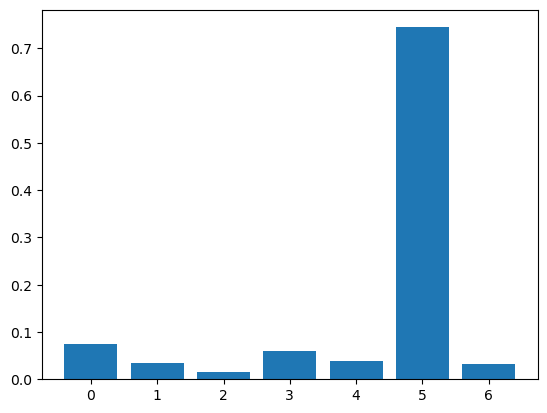

In [130]:
plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
plt.show()

# 5. Conclusiones

Para concluir esta práctica, vamos a elaborar unas conclusiones y un repaso a todos los procesos realizados, sobre todo desde el punto de vista de una aseguradora que se plantee este problema en la realidad. Lo primero de todo es obtener todos los datos en un intervalo de años. Como es complicado tener todos los detalles de cada momento en períodos tan largos, es normal encontrarse con valores perdidos. Si bien es cierto que en la práctica imputamos estos valores por la moda, en la realidad no sería tan fácil llegar a esta conclusión, si bien es cierto que es mejor opción que directamente eliminar las observaciones del conjunto de datos, ya que se podría perder mucha información valiosa de cara a la futura predicción. A cotinuación, nos damos cuenta de que los datos están desbalanceados, por lo que hay que llevar a cabo un balanceo. Esto para la aseguradora es vital, ya que si se trabajara con los datos originales, a la hora de predecir, siempre se obtendrían como predicciones aquel dato que aparezca en abundancia y, entonces, tendríamos muchos fallos de clasificación que resultarían nefastos económicamente hablando para tal aseguradora. Por último, desarrollamos varios modelos de predicción con sus respectivas métricas. Siguiendo los criterios previamente explicados, elegimos el modelo que más nos convenga, que sería el que la aseguradora emplearía para potenciar los aciertos y, así, ganar más clientes y, con ellos, más dinero.